In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
first = automap_base()
# reflect the tables
first.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
first.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
measurement = first.classes.measurement
station = first.classes.station


In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
date = session.query(measurement.date).order_by(measurement.date.desc()).first().date

<AxesSubplot:xlabel='Date'>

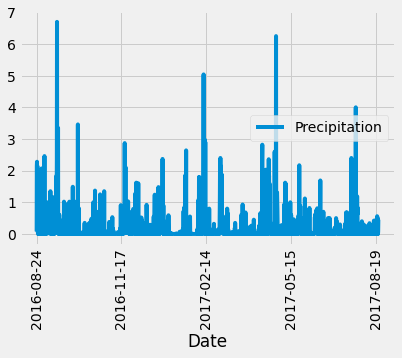

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_1 = dt.datetime.strptime(date, '%Y-%m-%d')-dt.timedelta(days=365)
year_1
# Perform a query to retrieve the data and precipitation scores
rain = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_1).\
    order_by(measurement.date).all()
rain
# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain, columns=['Date','Precipitation'])
rain_df.set_index('Date', inplace=True)
rain_df = rain_df.dropna()
rain_df

# Sort the dataframe by date
#As Above/Already Sorted
# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot(rot=90)



In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
total = session.query(station)

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
v_act = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
# most_active

v_act1 = ""
v_act_s = v_act[0][0]

for location in station:
        if(location.station == vact[0][0]):
            v_act1l = location.name
print(f"The most active station info:")
print(f"Name   : {v_act1}")
print(f"Station : {v_act[0][0]}")
print(f"Count : {v_act[0][1]}")
print("")
print('Stations in Descending Order')
print('----------------------------')
for v_act in v_act:
    print(v_act[0],"  ",v_act[1])

TypeError: 'DeclarativeMeta' object is not iterable

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_avg = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
    filter(measurement.station == v_act_s).all()

(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 52., 29.,  8.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <BarContainer object of 12 artists>)

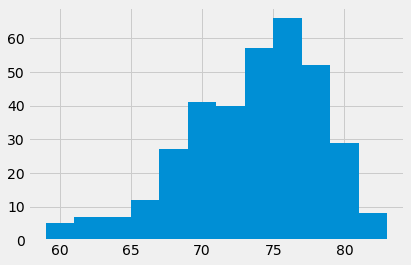

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_before = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == v_act_s).filter(measurement.date >= year_1).\
    group_by(measurement.date).all()
year_before

#Df Set Up
yearbefore_df = pd.DataFrame(data=year_before, columns=["date","tobs"])
yearbefore_df = yearbefore_df.set_index('date',drop=True)
yearbefore_df

#Histogram Plot
plt.hist(yearbefore_df['tobs'],12,label="tobs")

# Close session

In [ ]:
# Close Session
session.close()